<a href="https://colab.research.google.com/github/Johyeonje/Deep_Learning_Thesis/blob/master/VGG19_%EB%85%BC%EB%AC%B8%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob
import random
import sklearn

In [ ]:
# !tar -xvf '/content/path.tar'
# !tar -zxvf '/content/path.tar.gz'

In [ ]:
# !wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

In [ ]:
# !unzip tiny-imagenet-200.zip

In [ ]:
def load_data(data_path):
  data_lists = glob.glob(data_path+'*')
  filename_dict = dict()
  filename_dicts = dict()
  tmp = []
  count = 0
  for data_list in data_lists:
    id = os.path.basename(data_list)
    #id = data_list.split('/n')[1]
    image_path = os.path.join(data_list, 'images')
    image_set = glob.glob(image_path+'/*.JPEG')
    filename_dict[id] = image_set

  for i, (k, v) in enumerate(filename_dict.items()):
    filename_dicts[i] = filename_dict.get(k)
  

  return filename_dicts

In [ ]:
def make_batch(dataset, size, mode = cv2.IMREAD_COLOR):
  train_X = []
  train_Y = []
  mean = np.array([0.0, 0.0, 0.0])
  for key, value in dataset.items():
    label = np.zeros(200, dtype=np.float32)
    label[key] = 1
    for i, v in enumerate(value):
      image = cv2.imread(v, mode).astype(np.float32)
      
      # if image.shape[0] < 56 or image.shape[1] < 56:
      #   tmp = image.shape[0] if (image.shape[0] < image.shape[1]) else image.shape[1]
      #   image = image[0:tmp, 0:tmp]
      #   image = cv2.resize(image, dsize=(56,56))
      # else:
      #   top = random.randint(0,image.shape[0]-56)
      #   left = random.randint(0,image.shape[1]-56)
      #   image = image[top:top+56, left:left+56]
      
      image = image / 255.0
      train_X.append(image)
      train_Y.append(label)
      if i >= size:
        break

  train_X = np.array(train_X)
  train_Y = np.array(train_Y)
  normalize_data(train_X)
  print('Shape of trainX : ', train_X.shape)
  print('Shape of trainY : ', train_Y.shape)

  return train_X, train_Y

In [ ]:
# o = [[[[1,1],[1,1],[1,1],[1,1]],[[2,2],[2,2],[2,2],[2,2]],[[3,3],[3,3],[3,3],[3,3]],[[4,4],[4,4],[4,4],[4,4]]],
#      [[[1000,5],[1000,5],[5,5],[5,5]],[[6,6],[6,6],[6,6],[6,6]],[[7,7],[7,7],[7,7],[7,7]],[[8,8],[8,8],[8,8],[8,8]]],
#      [[[1,1],[1,1],[1,1],[1,1]],[[2,2],[2,2],[2,2],[2,2]],[[3,3],[3,3],[3,3],[3,3]],[[4,4],[4,4],[4,4],[4,4]]]]
# o = np.array(o)
# print(o.shape)
# qq = np.sum(o, axis=(1,2,3))
# print(qq)
# qq = qq/(o.shape[0]*4*4)
# print(qq)

In [ ]:
def build_model():
  model = tf.keras.Sequential([
        # tf.keras.layers.Conv2D(input_shape=(64,64,3), kernel_size=(3,3), padding='same',filters=64, activation='relu', dtype=tf.float32),
        # tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu', dtype=tf.float32),
        # tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), dtype=tf.float32),

        # tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu', dtype=tf.float32),
        # tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu', dtype=tf.float32),
        # tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), dtype=tf.float32),

        # tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='same', activation='relu', dtype=tf.float32),
        # tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='same', activation='relu', dtype=tf.float32),
        # tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='same', activation='relu', dtype=tf.float32),
        # tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='same', activation='relu', dtype=tf.float32),
        # tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), dtype=tf.float32),

        # tf.keras.layers.Conv2D(kernel_size=(3,3), filters=512, padding='same', activation='relu', dtype=tf.float32),
        # tf.keras.layers.Conv2D(kernel_size=(3,3), filters=512, padding='same', activation='relu', dtype=tf.float32),
        # tf.keras.layers.Conv2D(kernel_size=(3,3), filters=512, padding='same', activation='relu', dtype=tf.float32),
        # tf.keras.layers.Conv2D(kernel_size=(3,3), filters=512, padding='same', activation='relu', dtype=tf.float32),
        # tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), dtype=tf.float32),

        # tf.keras.layers.Conv2D(kernel_size=(3,3), filters=512, padding='same', activation='relu', dtype=tf.float32),
        # tf.keras.layers.Conv2D(kernel_size=(3,3), filters=512, padding='same', activation='relu', dtype=tf.float32),
        # tf.keras.layers.Conv2D(kernel_size=(3,3), filters=512, padding='same', activation='relu', dtype=tf.float32),
        # tf.keras.layers.Conv2D(kernel_size=(3,3), filters=512, padding='same', activation='relu', dtype=tf.float32),
        # tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), dtype=tf.float32),
        
        # tf.keras.layers.Flatten(),
        # tf.keras.layers.Dense(units=4096, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0005), dtype=tf.float32),
        # tf.keras.layers.Dense(units=4096, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0005), dtype=tf.float32),
        # tf.keras.layers.Dense(units=4096, activation='relu', dtype=tf.float32),
        # tf.keras.layers.Dense(units=4096, activation='relu', dtype=tf.float32),
        # tf.keras.layers.Dropout(rate=0.5),
        # tf.keras.layers.Dense(units=200, activation='softmax', dtype=tf.float32)

        tf.keras.layers.Conv2D(input_shape=(64,64,3), kernel_size=(3,3), padding='same',filters=64, activation='relu', dtype=tf.float32),
        tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu', dtype=tf.float32),
        tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), dtype=tf.float32),

        
        tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu', dtype=tf.float32),
        tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu', dtype=tf.float32),
        tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), dtype=tf.float32),


        tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='same', activation='relu', dtype=tf.float32),
        tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='same', activation='relu', dtype=tf.float32),
        tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), dtype=tf.float32),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=512, activation='relu', dtype=tf.float32),
        tf.keras.layers.Dense(units=512, activation='relu', dtype=tf.float32),
        tf.keras.layers.Dropout(rate=0.5),
        tf.keras.layers.Dense(units=200, activation='softmax', dtype=tf.float32)

  ])
  return model

In [ ]:
def normalize_data(x):
  sum = np.zeros(shape=[3], dtype=np.float32)
  for img in x:
    sum += np.sum(img, axis=(0, 1))
  mean = sum / (x.shape[0] * 4 * 4)
  print(mean)
  return x - mean

In [ ]:
train_X = []
train_Y = []
train_data_path = '/content/tiny-imagenet-200/train/'
train_dataset = load_data(train_data_path)
train_X, train_Y = make_batch(train_dataset, 200)
train_X, train_Y = sklearn.utils.shuffle(train_X, train_Y)

[101.78322139 114.71363184 122.99946517]
Shape of trainX :  (40200, 64, 64, 3)
Shape of trainY :  (40200, 200)


In [ ]:
model = build_model()
learning_rate = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=0.001,
    decay_steps=10,
    end_learning_rate=0.0001
)

optimizer = tf.optimizers.Adam(learning_rate)
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [ ]:
history = model.fit(train_X, train_Y, epochs=100, validation_split=0.25, batch_size=32)

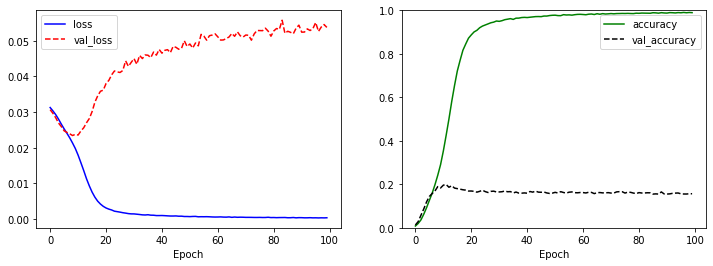

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1.0)
plt.legend()

plt.show()

#고찰

1. 이전에 data path에 대해 dict 형식으로 불러와서 train_X와 Y를 생성하는 작업에 대해 경험이 있어 어렵지 않았다.    
하지만 데이터양이 많아지자 RAM 용량의 초과로 세션이 다운되는 현상이 발생하였다.    
이를 통해서 학습 데이터의 구성에 fit을 따로 함수로 구현하여서 batch size 만큼 씩 이미지를 불러오는 방식의 중요성을 알았다.    
2. 데이터를 드라이브에 저장하여서 불러오는 방식을 사용했었는데,   
!wget(web get)을 사용하여 다운로드 링크를 불러와 데이터 로드하는 방식에 대해 알게되었다.
3. 데이터의 전처리 과정에서 로스의 단위가 천만에서 억 단위로 증가하는 현상이 발생했는데,   
이는 cv2.imread를 통해 이미지를 불러오고 32bit 실수형으로 변환하는 방식으로 해결하였다.
4. 전처리를 모두 적용하고 학습데이터의 정규화와 레이블링이 모두 제대로 되었다고 생각해서 학습을 진행했지만    
valid accuracy은 0에서 상승하지 않고 train loss는 0.315에 고정된 현상이 발생했다.   
이에 학습률을 변경, 드랍아웃을 제외 등 다양한 하이퍼파라미터 변경을 해보고,    
맥스풀링을 제외하는 등 구조를 변경해 보았지만 큰 차이가 없었다.    
이에 모델의 깊이와 파라미터의 갯수가 학습 데이터의 양(레이블 별 500장의 64*64 픽셀 크기의 이미지)이 너무 작다고 판단하여    
모델의 층의 갯수를 19개에서 7개로 줄인 다음 테스트하자 train loss가 정상적으로 줄어드는 것을 확인했다.    
하지만, valid loss는 줄어들지 않는 전형적인 과적합의 현상을 보여서 보다 깊은 모델로 다시 테스팅해야한다고 생각했다.